<font color=blue><h1 style='text-align:center;'>Twitter Sentiment Analysis<br></h1>
<h2 style='text-align:center;'><font color=black>Personal Project - Vineet Sagar<br></font></h2><br> 
<h4><font color=red> Twitter Data: Extracted using Twitter API V2 </font></h4>

<div class="alert alert-block alert-info"><h2><font color=Black>Data Extraction</font></h2></div>

In [1]:
#Initializing Important Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tweepy
from textblob import TextBlob
import re
from collections import Counter

<h2><font color='blue'> Reading the Credentials 

In [2]:
# Calling the Twitter Logic Credential Details
df_key=pd.read_excel("C:/Users/vinee/OneDrive/Desktop/Key.xlsx")

In [3]:
# Assigning the essential key values
access_token= df_key['pw'][3]
access_token_secret= df_key['pw'][4]
consumer_key= df_key['pw'][5]
consumer_secret= df_key['pw'][6]
Bearer_Token=df_key['pw'][2]

In [4]:
# Calling the Twitter client
client = tweepy.Client(bearer_token=Bearer_Token)

<h2><font color='blue'> Extracting Tweets using API

In [5]:
# User Inpur for the Topic of the sentiments to be analysed
query = input("Enter the Keywords related to serach Topic: ")
# query can be = 'Twitter, Elon Musk, Canada, toronto, Economy, Sports etc'

tweets=tweepy.Paginator(client.search_recent_tweets, query=query, tweet_fields=['context_annotations', 'created_at','lang','possibly_sensitive'], 
                        max_results=100).flatten(limit=100)

i=1
data = []
lang=[]
sens=[]
for tweet in tweets:
    print(str(i)+') '+tweet.text)
    data.append([tweet.text])
    lang.append([tweet.lang])
    sens.append([tweet.possibly_sensitive])
    i=i+1

df = pd.DataFrame(data, columns=['Tweet'])
df['Language'] = pd.DataFrame(lang, columns=['Language'])
df['Sensitivity']= pd.DataFrame(sens, columns=['Sensitivity'])

Enter the Keywords related to serach Topic: Canadian Economy 2023
1) RT @financialpost: Canadian dollar poised to rebound in 2023 if economic uncertainty clears https://t.co/akMf8NoRPQ
2) @CRDean5 @TheLastDegree @AllStreetsWolf @airic101 Agree on Canadian banks as those are over exposed to housing 

DXY and Gold are inversely correlated, with weakening economy Fed will be forced to pivot at some point in 2023 causing DXY to decrease
3) Canadian dollar poised to rebound in 2023 if economic uncertainty clears https://t.co/Hx6wGNaLBB
4) RT @nationalpost: Canadian dollar poised to rebound in 2023 if economic uncertainty clears https://t.co/tYcu1AnFYk
5) Canadian Economy: Bloomberg https://t.co/UoFGVeZo3c
6) RT @TorontoStar: Canadian economy added 104,000 jobs in December: Statistics Canada https://t.co/bgM7oIhOzS
7) Southwestern Ontario auto service specialists Economy Lube and Tire will sponsor the 2023 coverage of the Bridgestone CSBK Canadian National Championship National Road racing s

In [6]:
# Reviewing the heads of the main Data
df.head(10)

,Tweet,Language,Sensitivity
0,RT @financialpost: Canadian dollar poised to r...,en,False
1,@CRDean5 @TheLastDegree @AllStreetsWolf @airic...,en,False
2,Canadian dollar poised to rebound in 2023 if e...,en,False
3,RT @nationalpost: Canadian dollar poised to re...,en,False
4,Canadian Economy: Bloomberg https://t.co/UoFGV...,in,False
5,"RT @TorontoStar: Canadian economy added 104,00...",en,False
6,Southwestern Ontario auto service specialists ...,en,False
7,Canadian dollar poised to rebound in 2023 if e...,en,False
8,"The Canadian economy added 104,000 jobs in Dec...",en,False
9,RT @financialpost: Canadian dollar poised to r...,en,False


<div class="alert alert-block alert-info"><h2><font color=Black>Data Cleaning</font></h2></div>

In [7]:
# Retaining only Enlish Tweets from Twitter Data.
df_english= df[df.Language =="en"]

In [8]:
# Reviewing the Englist Tweets.
df_english.head(10)

,Tweet,Language,Sensitivity
0,RT @financialpost: Canadian dollar poised to r...,en,False
1,@CRDean5 @TheLastDegree @AllStreetsWolf @airic...,en,False
2,Canadian dollar poised to rebound in 2023 if e...,en,False
3,RT @nationalpost: Canadian dollar poised to re...,en,False
5,"RT @TorontoStar: Canadian economy added 104,00...",en,False
6,Southwestern Ontario auto service specialists ...,en,False
7,Canadian dollar poised to rebound in 2023 if e...,en,False
8,"The Canadian economy added 104,000 jobs in Dec...",en,False
9,RT @financialpost: Canadian dollar poised to r...,en,False
10,RT @nationalpost: Canadian dollar poised to re...,en,False


<h2><font color='blue'> Note: The Tweet on Twitter are available in all languages. We will only Review Tweets in English.

In [9]:
# Removing all the Duplicates from the English Tweets.
df_unique=df_english.drop_duplicates(subset=['Tweet'], keep='first')
df_unique

,Tweet,Language,Sensitivity
0,RT @financialpost: Canadian dollar poised to r...,en,False
1,@CRDean5 @TheLastDegree @AllStreetsWolf @airic...,en,False
2,Canadian dollar poised to rebound in 2023 if e...,en,False
3,RT @nationalpost: Canadian dollar poised to re...,en,False
5,"RT @TorontoStar: Canadian economy added 104,00...",en,False
...,...,...,...
88,The five Canadian CEOs have set ambitious 2023...,en,False
89,Check out the latest article in my newsletter:...,en,False
90,RT @LloydLongfield: Our government is inviting...,en,False
94,Our government is inviting Canadians from acro...,en,False


In [10]:
df_unique.reset_index(drop=True,inplace=True)

In [11]:
# Reviewing the Unique Englist Tweets.
df_unique.head(20)

,Tweet,Language,Sensitivity
0,RT @financialpost: Canadian dollar poised to r...,en,False
1,@CRDean5 @TheLastDegree @AllStreetsWolf @airic...,en,False
2,Canadian dollar poised to rebound in 2023 if e...,en,False
3,RT @nationalpost: Canadian dollar poised to re...,en,False
4,"RT @TorontoStar: Canadian economy added 104,00...",en,False
5,Southwestern Ontario auto service specialists ...,en,False
6,Canadian dollar poised to rebound in 2023 if e...,en,False
7,"The Canadian economy added 104,000 jobs in Dec...",en,False
8,"Canadian economy adds 104,000 jobs in December...",en,False
9,"Canadian economy adds 104,000 jobs in December...",en,False


<div class="alert alert-block alert-info"><h2><font color=Black>Regular Expressions</font></h2></div>

In [12]:
# Function to Clean the Tweets from Twitter using Regular Expression(re) Library.
import re
def cleanTxt(text):
    text=re.sub(r'@[A-Za-z0-9]+','',text) #To substitue the user names. 
    text=re.sub(r'#','',text)
    text=re.sub(r"\?",'',text)
    text=re.sub(r'!','',text)
    text=re.sub(r'amp','',text) # To substitute Ampersand
    text=re.sub(r'_','',text)
    text=re.sub(r':','',text)
    text=re.sub(r'\n','',text)
    text=re.sub(r'&',' and ',text)
    text=re.sub(r'RT','',text) # To substitute ReTweets
    text=re.sub(r'"','',text)
    text=re.sub(r"’",'',text)
    text=re.sub(r"‘",'',text)
    text=re.sub(r"'",'',text)
    text=re.sub(r",",'',text)
    text=re.sub(r'[A-Za-z0-9]{1}[.]+', '',text) # To substitute any texts followed by dots.
    text=re.sub(r'\s*RT\s*@[^:]*:.','',text) #To handle ReTweets.
    text=re.sub(r'(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)','',text) # To substitute Links
    text=re.sub(r'https?\/\/\S+','',text) # To substitute Links
    text=re.sub(r'https//','',text) # To substitute Links

    return text
df_unique['Tweet']=df_unique['Tweet'].apply(cleanTxt)

C:\Users\vinee\AppData\Local\Temp/ipykernel_4968/2194987311.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Tweet']=df_unique['Tweet'].apply(cleanTxt)


In [13]:
# Reviewing Clean Unique English Tweets from Twitter
df_unique.head(10)

,Tweet,Language,Sensitivity
0,Canadian dollar poised to rebound in 2023 if...,en,False
1,Agree on Canadian banks as those are over ...,en,False
2,Canadian dollar poised to rebound in 2023 if e...,en,False
3,Canadian dollar poised to rebound in 2023 if...,en,False
4,Canadian economy added 104000 jobs in Decemb...,en,False
5,Southwestern Ontario auto service specialists ...,en,False
6,Canadian dollar poised to rebound in 2023 if e...,en,False
7,The Canadian economy added 104000 jobs in Dece...,en,False
8,Canadian economy adds 104000 jobs in December ...,en,False
9,Canadian economy adds 104000 jobs in December ...,en,False


In [14]:
# Converting all words into to lower case.
df_unique['Tweet']=df_unique['Tweet'].str.lower()

C:\Users\vinee\AppData\Local\Temp/ipykernel_4968/3774127502.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Tweet']=df_unique['Tweet'].str.lower()


In [15]:
# Reviewing Clean Unique English Tweets from Twitter
df_unique.head(10)

,Tweet,Language,Sensitivity
0,canadian dollar poised to rebound in 2023 if...,en,False
1,agree on canadian banks as those are over ...,en,False
2,canadian dollar poised to rebound in 2023 if e...,en,False
3,canadian dollar poised to rebound in 2023 if...,en,False
4,canadian economy added 104000 jobs in decemb...,en,False
5,southwestern ontario auto service specialists ...,en,False
6,canadian dollar poised to rebound in 2023 if e...,en,False
7,the canadian economy added 104000 jobs in dece...,en,False
8,canadian economy adds 104000 jobs in december ...,en,False
9,canadian economy adds 104000 jobs in december ...,en,False


<div class="alert alert-block alert-info"><h2><font color=Black>Word List</font></h2></div>

In [16]:
# Creating a dataframe to create the Word List. Dropping variables Sensitivity and Language
df_word1=df_unique.drop(columns =['Sensitivity', 'Language'])

In [17]:
# Converting the dataframe word1 to list.
word_list1=df_word1.values.tolist()

In [18]:
# Printing the word list 1
word_list1

[['  canadian dollar poised to rebound in 2023 if economic uncertainty clears '],
 ['    agree on canadian banks as those are over exposed to housing dxy and gold are inversely correlated with weakening economy fed will be forced to pivot at some point in 2023 causing dxy to decrease'],
 ['canadian dollar poised to rebound in 2023 if economic uncertainty clears '],
 ['  canadian dollar poised to rebound in 2023 if economic uncertainty clears '],
 ['  canadian economy added 104000 jobs in december statistics canada '],
 ['southwestern ontario auto service specialists economy lube and tire will sponsor the 2023 coverage of the bridgestone csbk canadian national chionship national road racing series on the sports network – ts bridgestonecsbk bridgestonecsbk2023 '],
 ['canadian dollar poised to rebound in 2023 if economic uncertainty clears  go long gold and energy'],
 ['the canadian economy added 104000 jobs in december as the unemployment rate fell slightly to 0 per cent statistics canad

<h4><font color='blue'>Note: The Tweets have been stored in form of Nested List. Each Inner List represents a Tweet. In order to make a Word count of most popular Keywords in Tweets, we need to perform following steps: </font></h4>

* <h4>Convert the Tweet String to Words
* <h4>Move the Words from Inner List to Main List.

In [19]:
# Converting Tweets String to Words to analyze the top words related to search topic.
flat_list = [] # creating an empty list to store words from tweets.
str1=""  # Creating an empty string
for sublist in word_list1:
    for item in sublist:
        str1=item
        str2=str1.split(" ") # Splitting the String to Words
        flat_list.append(str2) # Appending the created words to a list
        str1=""

In [20]:
# Reviewing the Words created in Inner List.
flat_list

[['',
  '',
  'canadian',
  'dollar',
  'poised',
  'to',
  'rebound',
  'in',
  '2023',
  'if',
  'economic',
  'uncertainty',
  'clears',
  ''],
 ['',
  '',
  '',
  '',
  'agree',
  'on',
  'canadian',
  'banks',
  'as',
  'those',
  'are',
  'over',
  'exposed',
  'to',
  'housing',
  'dxy',
  'and',
  'gold',
  'are',
  'inversely',
  'correlated',
  'with',
  'weakening',
  'economy',
  'fed',
  'will',
  'be',
  'forced',
  'to',
  'pivot',
  'at',
  'some',
  'point',
  'in',
  '2023',
  'causing',
  'dxy',
  'to',
  'decrease'],
 ['canadian',
  'dollar',
  'poised',
  'to',
  'rebound',
  'in',
  '2023',
  'if',
  'economic',
  'uncertainty',
  'clears',
  ''],
 ['',
  '',
  'canadian',
  'dollar',
  'poised',
  'to',
  'rebound',
  'in',
  '2023',
  'if',
  'economic',
  'uncertainty',
  'clears',
  ''],
 ['',
  '',
  'canadian',
  'economy',
  'added',
  '104000',
  'jobs',
  'in',
  'december',
  'statistics',
  'canada',
  ''],
 ['southwestern',
  'ontario',
  'auto',
  'se

In [21]:
# Moving the Tweet Words from inner list to main list to make count of main Words.
flat_list_main=[]
for sublist in flat_list:
    for item in sublist:
        flat_list_main.append(item)

In [22]:
# Reviewing the Final Word List created. 
flat_list_main

['',
 '',
 'canadian',
 'dollar',
 'poised',
 'to',
 'rebound',
 'in',
 '2023',
 'if',
 'economic',
 'uncertainty',
 'clears',
 '',
 '',
 '',
 '',
 '',
 'agree',
 'on',
 'canadian',
 'banks',
 'as',
 'those',
 'are',
 'over',
 'exposed',
 'to',
 'housing',
 'dxy',
 'and',
 'gold',
 'are',
 'inversely',
 'correlated',
 'with',
 'weakening',
 'economy',
 'fed',
 'will',
 'be',
 'forced',
 'to',
 'pivot',
 'at',
 'some',
 'point',
 'in',
 '2023',
 'causing',
 'dxy',
 'to',
 'decrease',
 'canadian',
 'dollar',
 'poised',
 'to',
 'rebound',
 'in',
 '2023',
 'if',
 'economic',
 'uncertainty',
 'clears',
 '',
 '',
 '',
 'canadian',
 'dollar',
 'poised',
 'to',
 'rebound',
 'in',
 '2023',
 'if',
 'economic',
 'uncertainty',
 'clears',
 '',
 '',
 '',
 'canadian',
 'economy',
 'added',
 '104000',
 'jobs',
 'in',
 'december',
 'statistics',
 'canada',
 '',
 'southwestern',
 'ontario',
 'auto',
 'service',
 'specialists',
 'economy',
 'lube',
 'and',
 'tire',
 'will',
 'sponsor',
 'the',
 '2023',


In [23]:
# Making a count of the words created in the main list.
c=Counter(flat_list_main)

# Creating dataframe with list of words and count
df_list = pd.DataFrame.from_records(list(dict(c).items()), columns=['WordList','Count'])

In [24]:
# Printing the Word List dataset.
df_list

,WordList,Count
0,,126
1,canadian,68
2,dollar,10
3,poised,8
4,to,58
...,...,...
578,destruction,1
579,lpc,1
580,thats,1
581,accomplis,1


In [25]:
# Removing the extra spaces from the conversion and cleaning the text.
df_list['WordList']=df_list['WordList'].str.strip()

In [26]:
# Creating the variable Length to capture the length of the words in List.
df_list['Length']=df_list['WordList'].str.len()

In [27]:
# Reviewing the list of observation which are empty due to Data Cleaning action.
df_list[df_list['Length']==0].value_counts()

WordList  Count  Length
          126    0         1
dtype: int64

In [28]:
# Reviewing the Shape of Word List.
df_list.shape

(583, 3)

In [29]:
# Removing the blank observations.
df_list = df_list[df_list.Length != 0]

In [30]:
# Reviewing the Shape of Word List after removing the blank observation.
df_list.shape

(582, 3)

<h2><font color='blue'>Note: I've observed the Word List have word which are Article, Pronouns etc. Will need to remove them from our Word List.

In [31]:
# Removing the Article and Pronous from Word List.
Exclusions=["ourselves","hers","between","yourself","but","again","there","about","once","two","during","out","very","having","with","they",
"own","an","be","some","for","do","its","yours","such","into","of","most","itself","other","off","is","s","am","or","who",
"as","from","him","each","the","themselves","until","below","are","we","these","your","his","through","don","nor","me","were",
"her","more","himself","this","down","should","our","their","while","above","both","up","to","ours","had","she","all","no","when",
"at","any","before","them","same","and","been","have","in","will","on","does","yourselves","then","that","because","what","over",
"why","so","say","can","could", "couldn't","did","not","didn't","dont","now","under","he","you","herself","has","just","where","too","only","myself","which","those","i",
"after","few","whom","t","being","if","theirs","my","against","a","by","doing","it","how","further","was","here","than","taking",
"without","much","many","more","whole","want","still","doesn’t","doesnt","isn’t","isnt","take","took","since","would","put","thats","that's","say"
"says","see","like","gt;","get","getting","really","used","even","lets","202" ]

# Iterating df_list over Exclusion List to remove Exclusion Words.
for i in Exclusions:
    for j in range(len(df_list)):
        val = df_list.iloc[j,0]
        if val == i:
            df_list['WordList'] = df_list['WordList'].replace(val," ")

C:\Users\vinee\AppData\Local\Temp/ipykernel_4968/2005411275.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list['WordList'] = df_list['WordList'].replace(val," ")


In [32]:
# Re-calculate the length of the words in Word List.
df_list['Length']=df_list['WordList'].str.len()

C:\Users\vinee\AppData\Local\Temp/ipykernel_4968/3810608361.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_list['Length']=df_list['WordList'].str.len()


In [33]:
# Taking count of all the blank and unnecessary single alphabets from data
df_list[df_list['Length']==1].value_counts()

WordList  Count  Length
          1      1         22
          3      1         13
          2      1         12
          8      1          5
          5      1          4
          6      1          4
          7      1          3
          12     1          3
          11     1          2
          27     1          2
          10     1          1
-         6      1          1
–         1      1          1
|         5      1          1
;         5      1          1
5         1      1          1
2         2      1          1
0         5      1          1
.         2      1          1
(         2      1          1
          15     1          1
          87     1          1
          76     1          1
          58     1          1
          28     1          1
          9      1          1
          23     1          1
          19     1          1
—         2      1          1
dtype: int64

In [34]:
# Removing all blank and unnecessary single alphabets from data
df_list = df_list[df_list.Length != 1]

In [35]:
# Word list after all cleaning.
df_list

,WordList,Count,Length
1,canadian,68,8
2,dollar,10,6
3,poised,8,6
5,rebound,10,7
7,2023,42,4
...,...,...,...
577,total,1,5
578,destruction,1,11
579,lpc,1,3
581,accomplis,1,9


In [36]:
# Creating sorted count list to get Top 20 words from Word List.  
df_top=df_list.sort_values(by=['Count'],ascending=False)

In [37]:
# Printing the Sorted List
df_top

,WordList,Count,Length
1,canadian,68,8
28,economy,42,7
7,2023,42,4
9,economic,16,8
41,jobs,14,4
...,...,...,...
250,participants,1,12
249,businesse,1,9
246,ways,1,4
242,hear,1,4


In [38]:
# Keeping only Top 20 words.
df_top20=df_top[:20]

In [39]:
# Printing the Top 20 words 
df_top20

,WordList,Count,Length
1,canadian,68,8
28,economy,42,7
7,2023,42,4
9,economic,16,8
41,jobs,14,4
113,new,13,3
44,canada,12,6
10,uncertainty,11,11
42,december,11,8
11,clears,10,6


No handles with labels found to put in legend.


<AxesSubplot:title={'center':'Top 20 words'}, xlabel='WordList', ylabel='Count'>

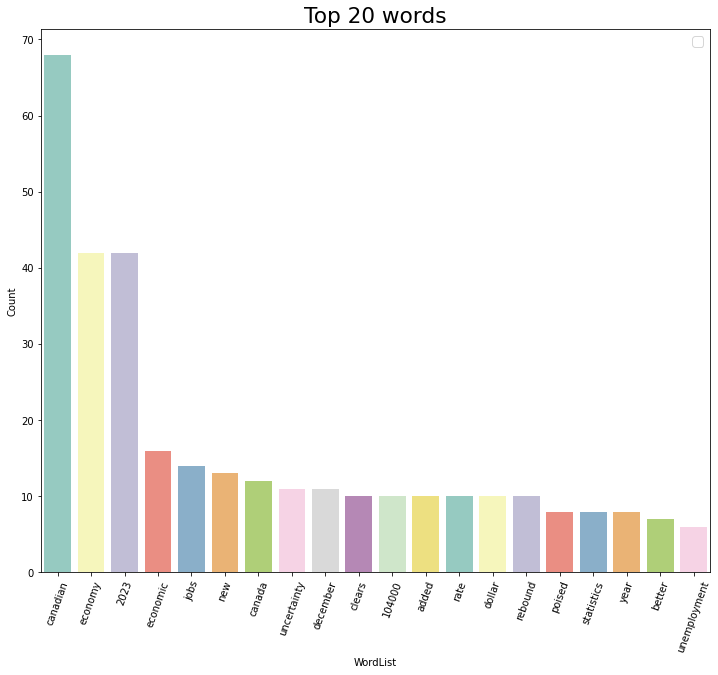

In [40]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=70)
plt.rcParams.update({'font.size': 18})
plt.legend(fontsize = 14)
plt.title("Top 20 words")
sns.barplot(x='WordList',y='Count',data=df_top20,palette = 'Set3')

In [41]:
!pip install wordcloud

In [42]:
from wordcloud import WordCloud

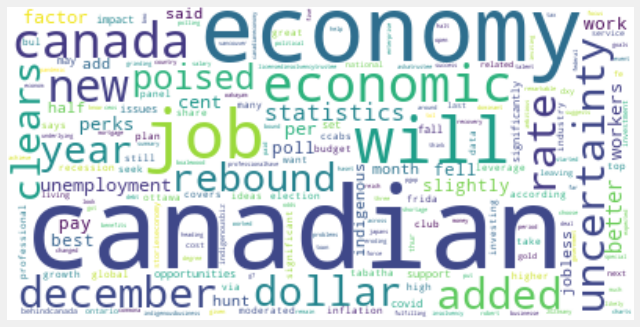

In [60]:
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations=False,background_color='white').generate(' '.join(df_unique['Tweet']))

# Display the generated Word Cloud
plt.figure(figsize=(10,10), facecolor=None)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<div class="alert alert-block alert-info"><h2><font color=Black>Sentiment Analysis</font></h2></div>

In [44]:
# Performing Sentiment Analysis

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df_unique['Subjectivity']=df_unique['Tweet'].apply(getSubjectivity)
df_unique['Polarity']=df_unique['Tweet'].apply(getPolarity)

df_unique.head(20)

C:\Users\vinee\AppData\Local\Temp/ipykernel_4968/381003387.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Subjectivity']=df_unique['Tweet'].apply(getSubjectivity)
C:\Users\vinee\AppData\Local\Temp/ipykernel_4968/381003387.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Polarity']=df_unique['Tweet'].apply(getPolarity)


,Tweet,Language,Sensitivity,Subjectivity,Polarity
0,canadian dollar poised to rebound in 2023 if...,en,False,0.200000,0.200000
1,agree on canadian banks as those are over ...,en,False,0.200000,-0.300000
2,canadian dollar poised to rebound in 2023 if e...,en,False,0.200000,0.200000
3,canadian dollar poised to rebound in 2023 if...,en,False,0.200000,0.200000
4,canadian economy added 104000 jobs in decemb...,en,False,0.000000,0.000000
5,southwestern ontario auto service specialists ...,en,False,0.000000,0.000000
6,canadian dollar poised to rebound in 2023 if e...,en,False,0.300000,0.075000
7,the canadian economy added 104000 jobs in dece...,en,False,0.166667,-0.166667
8,canadian economy adds 104000 jobs in december ...,en,False,0.000000,0.000000
9,canadian economy adds 104000 jobs in december ...,en,False,0.000000,0.000000


In [45]:
# Classifying the Polarity into Negative, Neutral and Positive.
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

df_unique['Analysis']=df_unique['Polarity'].apply(getAnalysis)

df_unique.head(20) 

C:\Users\vinee\AppData\Local\Temp/ipykernel_4968/3661808017.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique['Analysis']=df_unique['Polarity'].apply(getAnalysis)


,Tweet,Language,Sensitivity,Subjectivity,Polarity,Analysis
0,canadian dollar poised to rebound in 2023 if...,en,False,0.200000,0.200000,Positive
1,agree on canadian banks as those are over ...,en,False,0.200000,-0.300000,Negative
2,canadian dollar poised to rebound in 2023 if e...,en,False,0.200000,0.200000,Positive
3,canadian dollar poised to rebound in 2023 if...,en,False,0.200000,0.200000,Positive
4,canadian economy added 104000 jobs in decemb...,en,False,0.000000,0.000000,Neutral
5,southwestern ontario auto service specialists ...,en,False,0.000000,0.000000,Neutral
6,canadian dollar poised to rebound in 2023 if e...,en,False,0.300000,0.075000,Positive
7,the canadian economy added 104000 jobs in dece...,en,False,0.166667,-0.166667,Negative
8,canadian economy adds 104000 jobs in december ...,en,False,0.000000,0.000000,Neutral
9,canadian economy adds 104000 jobs in december ...,en,False,0.000000,0.000000,Neutral


In [46]:
# Create a dataframe to capture count of Positive, Neutral and Negative.
df_sens = df_unique['Analysis'].value_counts().rename_axis('Analysis').reset_index(name='Counts')

In [47]:
# Sorting the values to print Positive, Neutral and Negative.
df_sens=df_sens.sort_values(by=['Analysis'],ascending=False)

In [48]:
# Print the Dataset with count
df_sens

,Analysis,Counts
0,Positive,50
1,Neutral,18
2,Negative,7


<AxesSubplot:title={'center':'Polarity Graph'}, xlabel='Analysis', ylabel='Counts'>

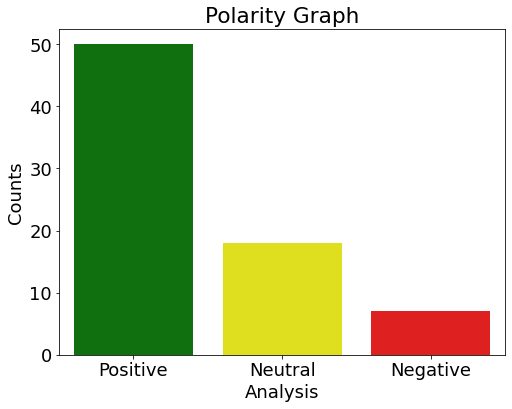

In [49]:
# Plotting Barplot of Positive, Neutral and Negative Counts.
plt.figure(figsize=(8,6))
plt.title("Polarity Graph")
colors = ['green', 'yellow', 'red']
sns.barplot(x="Analysis",y="Counts",data=df_sens,palette =colors)

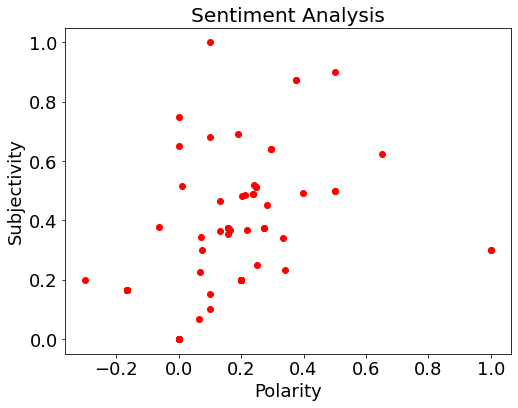

In [50]:
# Plotting Sentiment Analysis Graph of Subjectivity and Polarity. 
plt.figure(figsize=(8,6))
plt.scatter(df_unique['Polarity'],df_unique['Subjectivity'],color='red')
plt.style.use('fivethirtyeight')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()